<a href="https://colab.research.google.com/github/Andrew-Negrut/MachineLearning/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
# Support Vector Machine from scratch with soft margin

In [135]:
import numpy as np
import matplotlib.pyplot as plt

In [136]:
from sklearn.datasets import make_classification

In [137]:
x, y = make_classification(n_samples=100, n_features=2, n_redundant=0)

In [148]:
# Change the labels so they are 1 and -1.

In [138]:
for i in range(len(y)):
  if y[i] == 0:
    y[i] = -1

In [149]:
# color our data for better visualization.

In [139]:
colors = []
for i in range(len(y)):
  if y[i] == -1:
    colors.append('red')
  else:
    colors.append('blue')

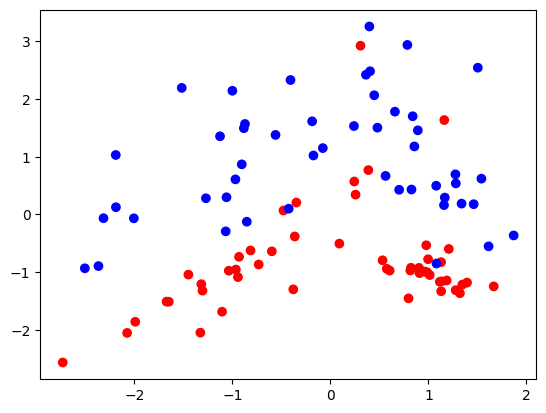

In [140]:
plt.scatter(x[:, 0], x[:, 1], c=colors)

In [150]:
# Hypothesis function

In [141]:
def h_theta(theta, b, x_inp, y_inp):
  return y_inp * (np.dot(theta, x_inp) + b)

In [151]:
# Cost function

In [142]:
def cost(theta, b, x, y, m, c):
  res = 0
  for i in range(m):
    res += max(0, 1 - h_theta(theta, b, x[i], y[i]))

  return 0.5 * (np.linalg.norm(theta) ** 2) + c * res

In [152]:
# Gradient descent to find optimal weights and bias term.

In [143]:
def g_descent(theta, b, x, y, m, n, alpha, c):
  for trial in range(1000):
    for i in range(m):
      if h_theta(theta, b, x[i], y[i]) >= 1:
        theta_new = theta - alpha * theta
        b_new = b
      else:
        theta_new = theta - alpha * (theta - c * y[i] * x[i])
        b_new = b - alpha * (-1 * c * y[i])

      theta = theta_new.copy()
      b = b_new

    print("Trial ", trial, " cost: ", cost(theta, b, x, y, m, c))

  return theta, b

In [144]:
theta = np.zeros(2)
b = 0

In [ ]:
theta_final, b_final = g_descent(theta, b, x, y, x.shape[0], x.shape[1], 0.001,
                                 1)
theta_final, b_final

In [153]:
# Plot results

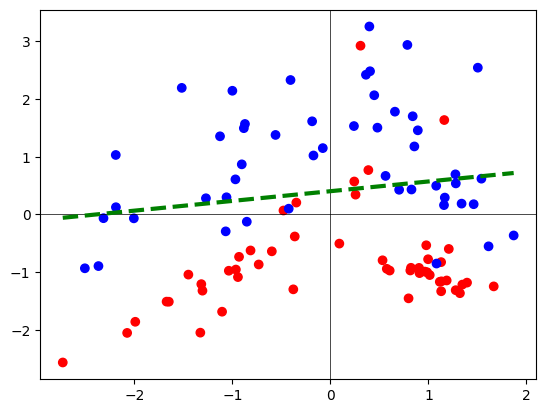

In [155]:
plt.scatter(x[:, 0], x[:, 1], c=colors)
plt.axhline(0, color='black', linewidth=.5)
plt.axvline(0, color='black', linewidth=.5)

x0_inp = np.linspace(np.min(x[:, 0]), np.max(x[:, 0]))
plt.plot(x0_inp, ((-1 * b_final) / theta_final[1]) - ((theta_final[0] * x0_inp)
 / theta_final[1]), linestyle="dashed", linewidth=3, color='g')
plt.show()